# 2. Mambaについてもう少し

In [1]:
using Distributions
using Plots

## 同じ物語、異なる結末
ユーザーの振る舞いが変化する変化点のサンプリング

In [2]:
tau = rand(DiscreteUniform(0, 80))

26

指数分布$\text{Exp}(\alpha)$から$\lambda_1$と$\lambda_2$をサンプリング。パラメトライズがPyMCと違うことに注意

In [8]:
theta = 20
lambda_1, lambda_2 = rand(Exponential(theta), 2)

2-element Array{Float64,1}:
  4.213585844431157
 15.104817169175416

日付$\tau$より前は$\lambda=\lambda_1$, 日付$\tau$より後は$\lambda=\lambda_2$とする

In [9]:
lambda_ = cat(fill(lambda_1, tau), fill(lambda_2, 80 - tau), dims = 1)

80-element Array{Float64,1}:
  4.213585844431157
  4.213585844431157
  4.213585844431157
  4.213585844431157
  4.213585844431157
  4.213585844431157
  4.213585844431157
  4.213585844431157
  4.213585844431157
  4.213585844431157
  4.213585844431157
  4.213585844431157
  4.213585844431157
  ⋮                
 15.104817169175416
 15.104817169175416
 15.104817169175416
 15.104817169175416
 15.104817169175416
 15.104817169175416
 15.104817169175416
 15.104817169175416
 15.104817169175416
 15.104817169175416
 15.104817169175416
 15.104817169175416

$\text{Poisson}(\lambda_1), \text{Poisson}(\lambda_2)$からサンプリングする

In [10]:
data = @.rand(Poisson(lambda_))

80-element Array{Int64,1}:
  4
  4
  2
  3
  4
  2
  6
  3
  6
  1
  5
  2
  3
  ⋮
 16
 11
 15
 13
 13
 18
 19
 20
 11
 20
 21
 11

プロットする。オレンジが変化点

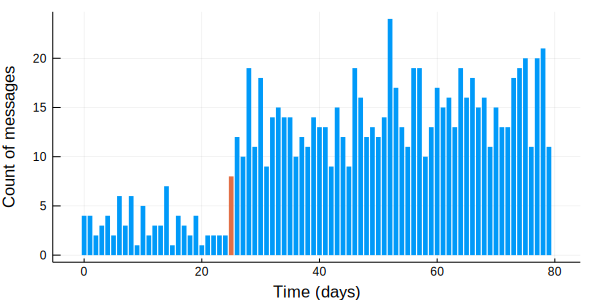

In [15]:
barc = fill(1, 80)
barc[tau] = 2
bar(0:80-1, data, size = [600, 300], linecolor = :transparent, fillcolor = barc,
    xlabel = "Time (days)", ylabel = "Count of messages", label = "")

In [61]:
function plot_artificial_sms_dataset()
    tau = rand(DiscreteUniform(0, 80))
    theta = 20
    lambda_1, lambda_2 = rand(Exponential(theta), 2)
    lambda_ = cat(fill(lambda_1, tau), fill(lambda_2, 80 - tau), dims = 1)
    data = @.rand(Poisson(lambda_))
    barc = fill(1, 80)
    barc[tau] = 2
    bar(0:80-1, data, linecolor = :transparent, fillcolor = barc,
        xlabel = "Time (days)", ylabel = "Count of messages", label = "")
end

plot_artificial_sms_dataset (generic function with 1 method)

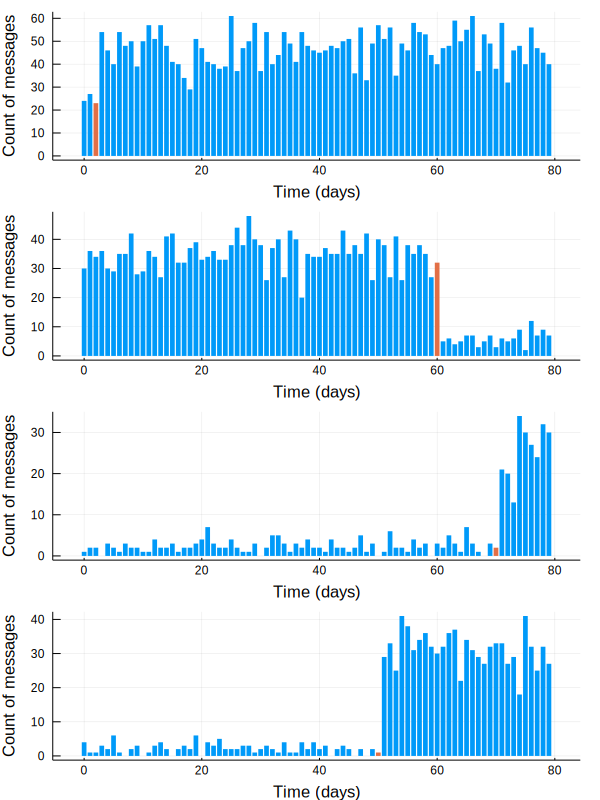

In [63]:
plts = []
for i in 1:4
    push!(plts, plot_artificial_sms_dataset())
end
plot(plts..., layout = (4, 1), size = [600, 800])